# Prerequisite

This notebook focuses on feature engineering for the Match result predictive models.

**Prerequisite**: It requires to the prior execution of notebooks:
- `02_expected_goals_model.ipynb`
- `03_data_wrangling.ipynb`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dim_team = pd.read_csv('../Data/dim_team.csv')

In [3]:
import pickle

with open('../Data/match_statistics.pkl', 'rb') as file:
    match_statistics = pickle.load(file)
    
match_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   match_date      1826 non-null   datetime64[ns]
 1   home_team       1826 non-null   object        
 2   away_team       1826 non-null   object        
 3   home_shot       1826 non-null   int64         
 4   away_shot       1826 non-null   int64         
 5   home_sot        1826 non-null   int64         
 6   away_sot        1826 non-null   int64         
 7   home_pass       1826 non-null   int64         
 8   away_pass       1826 non-null   int64         
 9   home_corner     1826 non-null   int64         
 10  away_corner     1826 non-null   int64         
 11  home_freekick   1826 non-null   int64         
 12  away_freekick   1826 non-null   int64         
 13  home_foul       1826 non-null   int64         
 14  away_foul       1826 non-null   int64         
 15  home

# Feature Engineering

## 1. Teams' points

In [4]:
match_statistics['home_point'] = match_statistics['result'].apply(lambda x: 3 if x == 'Home' else 1 if x == 'Draw' else 0)
match_statistics['away_point'] = match_statistics['result'].apply(lambda x: 3 if x == 'Away' else 1 if x == 'Draw' else 0)

In [5]:
match_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   match_date      1826 non-null   datetime64[ns]
 1   home_team       1826 non-null   object        
 2   away_team       1826 non-null   object        
 3   home_shot       1826 non-null   int64         
 4   away_shot       1826 non-null   int64         
 5   home_sot        1826 non-null   int64         
 6   away_sot        1826 non-null   int64         
 7   home_pass       1826 non-null   int64         
 8   away_pass       1826 non-null   int64         
 9   home_corner     1826 non-null   int64         
 10  away_corner     1826 non-null   int64         
 11  home_freekick   1826 non-null   int64         
 12  away_freekick   1826 non-null   int64         
 13  home_foul       1826 non-null   int64         
 14  away_foul       1826 non-null   int64         
 15  home

## 2. xG values

### Load Wyscount data

Match data

In [6]:
match_data = [
    'matches_England.json',
    'matches_France.json',
    'matches_Germany.json',
    'matches_Italy.json',
    'matches_Spain.json'
]

match_list = []
for data in match_data:
    match_list.append(pd.read_json(f'../Data/Wyscout/matches/{data}'))

ws_match = pd.concat(match_list)
ws_match.reset_index(drop=True, inplace=True)
ws_match.head()

status  roundId  gameweek  \
0  Played  4405654        38   
1  Played  4405654        38   
2  Played  4405654        38   
3  Played  4405654        38   
4  Played  4405654        38   

                                           teamsData  seasonId  \
0  {'1646': {'scoreET': 0, 'coachId': 8880, 'side...    181150   
1  {'1628': {'scoreET': 0, 'coachId': 8357, 'side...    181150   
2  {'1609': {'scoreET': 0, 'coachId': 7845, 'side...    181150   
3  {'1651': {'scoreET': 0, 'coachId': 8093, 'side...    181150   
4  {'1644': {'scoreET': 0, 'coachId': 93112, 'sid...    181150   

               dateutc  winner                     venue     wyId  \
0  2018-05-13 14:00:00    1659                 Turf Moor  2500089   
1  2018-05-13 14:00:00    1628             Selhurst Park  2500090   
2  2018-05-13 14:00:00    1609  The John Smith's Stadium  2500091   
3  2018-05-13 14:00:00    1612                   Anfield  2500092   
4  2018-05-13 14:00:00    1611              Old Trafford  2500093   

                                          label  \
0              Burnley - AFC Bournemouth, 1 - 2   
1  Crystal Palace - West Bromwich Albion, 2 - 0   
2            Huddersfield Town - Arsenal, 0 - 1   
3     Liverpool - Brighton & Hove Albion, 4 - 0   
4            Manchester United - Watford, 1 - 0   

                               date  \
0  May 13, 2018 at 4:00:00 PM GMT+2   
1  May 13, 2018 at 4:00:00 PM GMT+2   
2  May 13, 2018 at 4:00:00 PM GMT+2   
3  May 13, 2018 at 4:00:00 PM GMT+2   
4  May 13, 2018 at 4:00:00 PM GMT+2   

                                            referees duration  competitionId  
0  [{'refereeId': 385705, 'role': 'referee'}, {'r...  Regular            364  
1  [{'refereeId': 381851, 'role': 'referee'}, {'r...  Regular            364  
2  [{'refereeId': 384965, 'role': 'referee'}, {'r...  Regular            364  
3  [{'refereeId': 385704, 'role': 'referee'}, {'r...  Regular            364  
4  [{'refereeId': 381853, 'role': 'referee'}, {'r...  Regular            364

Event data

In [7]:
event_data = [
    'events_England.json',
    'events_France.json',
    'events_Germany.json',
    'events_Italy.json',
    'events_Spain.json'
]

event_list = []
for data in event_data:
    event_list.append(pd.read_json('../Data/Wyscout/events/' + data))

ws_event = pd.concat(event_list)
ws_event.head()

eventId subEventName            tags  playerId  \
0        8  Simple pass  [{'id': 1801}]     25413   
1        8    High pass  [{'id': 1801}]    370224   
2        8    Head pass  [{'id': 1801}]      3319   
3        8    Head pass  [{'id': 1801}]    120339   
4        8  Simple pass  [{'id': 1801}]    167145   

                                  positions  matchId eventName  teamId  \
0  [{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]  2499719      Pass    1609   
1  [{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]  2499719      Pass    1609   
2  [{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]  2499719      Pass    1609   
3  [{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]  2499719      Pass    1609   
4  [{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]  2499719      Pass    1609   

  matchPeriod   eventSec subEventId         id  
0          1H   2.758649         85  177959171  
1          1H   4.946850         83  177959172  
2          1H   6.542188         82  177959173  
3          1H   8.143395         82  177959174  
4          1H  10.302366         85  177959175

In [8]:
ws_event['matchPeriod'].value_counts()

matchPeriod
1H    1541033
2H    1530362
Name: count, dtype: int64

In [9]:
ws_event['matchPeriod'] = ws_event['matchPeriod'].apply(lambda x: 1 if x == '1H' else 2)
ws_event['eventSec'] = ws_event['eventSec'] + (ws_event['matchPeriod'] - 1) * 45 * 60

Player data

In [10]:
player_data = pd.read_json('../Data/Wyscout/players.json')
player_data.head()

passportArea  weight  \
0  {'name': 'Turkey', 'id': '792', 'alpha3code': ...      78   
1  {'name': 'Senegal', 'id': '686', 'alpha3code':...      73   
2  {'name': 'France', 'id': '250', 'alpha3code': ...      72   
3  {'name': 'Senegal', 'id': '686', 'alpha3code':...      82   
4  {'name': 'France', 'id': '250', 'alpha3code': ...      84   

           firstName middleName     lastName currentTeamId   birthDate  \
0              Harun                   Tekin          4502  1989-06-17   
1             Malang                    Sarr          3775  1999-01-23   
2               Over                Mandanda          3772  1998-10-26   
3  Alfred John Momar                 N'Diaye           683  1990-03-06   
4           Ibrahima             Konat\u00e9          2975  1999-05-25   

   height                                               role  \
0     187  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
1     182  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   
2     176  {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...   
3     187  {'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...   
4     192  {'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...   

                                           birthArea    wyId   foot  \
0  {'name': 'Turkey', 'id': '792', 'alpha3code': ...   32777  right   
1  {'name': 'France', 'id': '250', 'alpha3code': ...  393228   left   
2  {'name': 'France', 'id': '250', 'alpha3code': ...  393230          
3  {'name': 'France', 'id': '250', 'alpha3code': ...   32793  right   
4  {'name': 'France', 'id': '250', 'alpha3code': ...  393247  right   

        shortName currentNationalTeamId  
0        H. Tekin                  4687  
1         M. Sarr                  4423  
2     O. Mandanda                  null  
3      A. N'Diaye                 19314  
4  I. Konat\u00e9                  null

### Load xG model

In [11]:
import pickle

with open('../Models/Expected Model/xG_model.pkl', 'rb') as file:
    xG_model = pickle.load(file)
    


### Transform input

In [12]:
import numpy as np

from mplsoccer.dimensions import create_pitch_dims

dim = create_pitch_dims(pitch_type='uefa')

def calculate_visible(x, y, dim=dim):
    d1 = abs(dim.right - x)
    d2 = abs(dim.center_width - y)
    goal_width = dim.goal_width
    angle_rad = np.arctan(goal_width * d1 / (d1**2 + d2**2 - (goal_width/2)**2))
    if angle_rad < 0:
        angle_rad += np.pi
    return np.degrees(angle_rad)

def calculate_distance(x, y, dim=dim):
    d1 = abs(dim.right - x)
    d2 = abs(dim.center_width - y)
    return np.sqrt(d1**2 + d2**2)

def extract_shot_type(x):
    if x == 'Shot':
        return 'open_play'
    elif x == 'Free kick shot':
        return 'free_kick'
    elif x == 'Penalty':
        return 'penalty'

def extract_body_part(x):
    if 401 in x:
        return "Right Foot"
    elif 402 in x:
        return "Left Foot"
    elif 403 in x:
        return "Head/Other"

def extract_foot(x):
    if x == 'right':
        return 'Right Foot'
    elif x == 'left':
        return 'Left Foot'
    elif x == 'both':
        return 'Both'
    else:
        return 'Right Foot'

In [13]:
strong_foot = player_data[['wyId', 'foot']]
strong_foot['foot'] = strong_foot['foot'].apply(extract_foot)

ws_shot = ws_event[ws_event['subEventName'].isin(['Shot', 'Free kick shot', 'Penalty'])][['matchId','teamId','positions', 'subEventName', 'tags', 'playerId', 'eventSec']]

# convert x,y positions to 120x80 dimensions as in Statsbomb data
ws_shot['x'] = ws_shot['positions'].apply(lambda x: x[0]['x'])*dim.pitch_length/100
ws_shot['y'] = ws_shot['positions'].apply(lambda x: x[0]['y'])*dim.pitch_width/100

# convert tags to list of tag ids
ws_shot['tags'] = ws_shot['tags'].apply(lambda x: [tag['id'] for tag in x])

# extract shot type from subEventName
ws_shot['shot_type'] = ws_shot['subEventName'].apply(extract_shot_type)

# extract body part from tags
ws_shot['body_part'] = ws_shot['tags'].apply(extract_body_part)

# merge strong_foot data
ws_shot = ws_shot.merge(strong_foot, left_on='playerId', right_on='wyId', how='left')
ws_shot['is_strong_foot'] = (ws_shot['foot'] == ws_shot['body_part']) | (ws_shot['foot'] == 'both')

# calculate visible angle and distance
ws_shot['visible_angle'] = ws_shot.apply(lambda x: calculate_visible(x['x'], x['y']), axis=1)
ws_shot['distance'] = ws_shot.apply(lambda x: calculate_distance(x['x'], x['y']), axis=1)

# calculate shot outcome
ws_shot['outcome'] = ws_shot['tags'].apply(lambda x: 1 if 101 in x else 0)

ws_shot.head()

matchId  teamId                                   positions subEventName  \
0  2499719    1609      [{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]         Shot   
1  2499719    1631  [{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]         Shot   
2  2499719    1631  [{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]         Shot   
3  2499719    1609      [{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]         Shot   
4  2499719    1609      [{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]         Shot   

                          tags  playerId    eventSec       x      y  \
0  [101, 402, 201, 1205, 1801]     25413   94.595788   92.40  27.88   
1       [401, 201, 1211, 1802]     26150  179.854785   89.25  35.36   
2  [101, 403, 201, 1207, 1801]     14763  254.745027  100.80  35.36   
3       [401, 201, 1215, 1802]      7868  425.824035   85.05  22.44   
4       [402, 201, 1205, 1801]      7868  815.462015   78.75  20.40   

   shot_type   body_part     wyId        foot  is_strong_foot  visible_angle  \
0  open_play   Left Foot  25413.0  Right Foot           False      26.770923   
1  open_play  Right Foot  26150.0   Left Foot           False      25.986925   
2  open_play  Head/Other  14763.0  Right Foot           False      78.788301   
3  open_play  Right Foot   7868.0  Right Foot            True      15.737204   
4  open_play   Left Foot   7868.0  Right Foot           False      12.585866   

    distance  outcome  
0  14.007655        1  
1  15.808608        0  
2   4.414703        1  
3  23.057235        0  
4  29.563872        0

### Apply xG model

In [14]:
X = ws_shot[['x', 'y', 'shot_type', 'body_part', 'is_strong_foot', 'visible_angle', 'distance']]

In [15]:
ws_shot['xG'] = xG_model.predict_proba(X)[:, 1]
ws_shot.head()

matchId  teamId                                   positions subEventName  \
0  2499719    1609      [{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]         Shot   
1  2499719    1631  [{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]         Shot   
2  2499719    1631  [{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]         Shot   
3  2499719    1609      [{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]         Shot   
4  2499719    1609      [{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]         Shot   

                          tags  playerId    eventSec       x      y  \
0  [101, 402, 201, 1205, 1801]     25413   94.595788   92.40  27.88   
1       [401, 201, 1211, 1802]     26150  179.854785   89.25  35.36   
2  [101, 403, 201, 1207, 1801]     14763  254.745027  100.80  35.36   
3       [401, 201, 1215, 1802]      7868  425.824035   85.05  22.44   
4       [402, 201, 1205, 1801]      7868  815.462015   78.75  20.40   

   shot_type   body_part     wyId        foot  is_strong_foot  visible_angle  \
0  open_play   Left Foot  25413.0  Right Foot           False      26.770923   
1  open_play  Right Foot  26150.0   Left Foot           False      25.986925   
2  open_play  Head/Other  14763.0  Right Foot           False      78.788301   
3  open_play  Right Foot   7868.0  Right Foot            True      15.737204   
4  open_play   Left Foot   7868.0  Right Foot           False      12.585866   

    distance  outcome        xG  
0  14.007655        1  0.146827  
1  15.808608        0  0.130197  
2   4.414703        1  0.399258  
3  23.057235        0  0.039915  
4  29.563872        0  0.019742

### Approach 1 - Aggregate match xG vlues

In [16]:
# calculated xG
ws_xg = ws_shot.groupby(["matchId","teamId"])["xG"].sum().reset_index(name='xG')
ws_home_xg = ws_xg
ws_home_xg = ws_home_xg.rename(columns={"matchId": "match_id","teamId": "home_team_id", "xG": "home_xg"})
ws_away_xg = ws_xg
ws_away_xg = ws_away_xg.rename(columns={"matchId": "match_id","teamId": "away_team_id", "xG": "away_xg"})

In [17]:
ws_df = ws_match[['wyId', 'dateutc', 'label']].copy(deep=True)
ws_df['match_date'] = ws_df['dateutc'].apply(lambda x: x.split()[0])
ws_df['match_date'] = pd.to_datetime(ws_df['match_date'])

# extract team ids
def extract_team_ids(teams_data):
    home_team_id = None
    away_team_id = None
    for team_id, team_info in teams_data.items():
        if team_info['side'] == 'home':
            home_team_id = team_info['teamId']
        elif team_info['side'] == 'away':
            away_team_id = team_info['teamId']
    return home_team_id, away_team_id
ws_df[['home_team_id', 'away_team_id']] = ws_match['teamsData'].apply(lambda x: pd.Series(extract_team_ids(x)))

ws_df['home_team'] = ws_df['home_team_id'].map(dim_team.set_index('ws_team_id')['team_name'])
ws_df['away_team'] = ws_df['away_team_id'].map(dim_team.set_index('ws_team_id')['team_name'])

ws_df.drop(columns=['label', 'dateutc'], inplace=True)
ws_df.rename(columns={'wyId':'match_id'}, inplace=True)

In [18]:
ws_df = ws_df.merge(ws_home_xg, on=["match_id","home_team_id"], how="left")
ws_df = ws_df.merge(ws_away_xg, on=["match_id","away_team_id"], how="left")

# ws_df.drop(columns=['match_id', 'home_team_id', 'away_team_id'], inplace=True)

ws_df.head()

match_id match_date  home_team_id  away_team_id          home_team  \
0   2500089 2018-05-13          1646          1659            Burnley   
1   2500090 2018-05-13          1628          1627     Crystal Palace   
2   2500091 2018-05-13          1673          1609       Huddersfield   
3   2500092 2018-05-13          1612          1651          Liverpool   
4   2500093 2018-05-13          1611          1644  Manchester United   

              away_team   home_xg   away_xg  
0           Bournemouth  1.060139  1.587633  
1  West Bromwich Albion  1.601664  0.276735  
2               Arsenal  2.398497  1.849079  
3              Brighton  3.189817  0.063215  
4               Watford  0.411372  0.926944

### Approach 2 - xG vectors

In [19]:
ws_shot.sort_values('eventSec', inplace=True)

ws_xg_vector = ws_shot.groupby(['matchId', 'teamId'])['xG'].apply(list).reset_index(name='xG_vector')
ws_home_xg_vector = ws_xg_vector
ws_home_xg_vector = ws_home_xg_vector.rename(columns={"matchId": "match_id", "teamId": "home_team_id", "xG_vector": "home_xg_vector"})
ws_away_xg_vector = ws_xg_vector
ws_away_xg_vector = ws_away_xg_vector.rename(columns={"matchId": "match_id", "teamId": "away_team_id", "xG_vector": "away_xg_vector"})

ws_xg_time_vector = ws_shot.groupby(['matchId', 'teamId'])['eventSec'].apply(list).reset_index(name='xg_time_vector')
ws_home_xg_time_vector = ws_xg_time_vector
ws_home_xg_time_vector = ws_home_xg_time_vector.rename(columns={"matchId": "match_id", "teamId": "home_team_id", "xg_time_vector": "home_xg_time_vector"})
ws_away_xg_time_vector = ws_xg_time_vector
ws_away_xg_time_vector = ws_away_xg_time_vector.rename(columns={"matchId": "match_id", "teamId": "away_team_id", "xg_time_vector": "away_xg_time_vector"})

In [20]:
ws_df = ws_df.merge(ws_home_xg_vector, on=["match_id","home_team_id"], how="left")
ws_df = ws_df.merge(ws_away_xg_vector, on=["match_id","away_team_id"], how="left")
ws_df = ws_df.merge(ws_home_xg_time_vector, on=["match_id","home_team_id"], how="left")
ws_df = ws_df.merge(ws_away_xg_time_vector, on=["match_id","away_team_id"], how="left")

ws_df.drop(columns=['match_id', 'home_team_id', 'away_team_id'], inplace=True)

ws_df.head()

match_date          home_team             away_team   home_xg   away_xg  \
0 2018-05-13            Burnley           Bournemouth  1.060139  1.587633   
1 2018-05-13     Crystal Palace  West Bromwich Albion  1.601664  0.276735   
2 2018-05-13       Huddersfield               Arsenal  2.398497  1.849079   
3 2018-05-13          Liverpool              Brighton  3.189817  0.063215   
4 2018-05-13  Manchester United               Watford  0.411372  0.926944   

                                      home_xg_vector  \
0  [0.03845926475369499, 0.04671639146981596, 0.2...   
1  [0.0404232940230185, 0.2158869207739695, 0.050...   
2  [0.11472588143254832, 0.39380198512952175, 0.5...   
3  [0.03738379077800031, 0.03090011286061972, 0.3...   
4  [0.020982484370475805, 0.08331930699464311, 0....   

                                      away_xg_vector  \
0  [0.124709977578139, 0.06337222748427232, 0.044...   
1  [0.03405484985350696, 0.03410553918610149, 0.1...   
2  [0.029897892488658016, 0.11314249968774759, 0....   
3        [0.03828859627070523, 0.024926621090691384]   
4  [0.07026879011916477, 0.12091450366294058, 0.1...   

                                 home_xg_time_vector  \
0  [1324.245616, 1717.47429, 2306.063575, 2307.08...   
1  [371.89798099999996, 1055.979039, 1537.258327,...   
2  [168.38825500000002, 288.583578, 291.366261, 6...   
3  [325.50133500000004, 368.518015, 1113.362778, ...   
4  [698.067834, 916.854501, 1855.537956, 1998.092...   

                                 away_xg_time_vector  
0  [1239.333857, 1494.384387, 1523.716107, 1651.2...  
1  [574.051451, 708.380178, 2338.360535, 2941.019...  
2  [218.81478299999998, 1097.331034, 1123.32366, ...  
3                         [2159.097752, 3142.973368]  
4  [560.301564, 2598.007302, 2644.926509, 2790.78...

In [21]:
ws_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   match_date           1826 non-null   datetime64[ns]
 1   home_team            1826 non-null   object        
 2   away_team            1826 non-null   object        
 3   home_xg              1826 non-null   float64       
 4   away_xg              1824 non-null   float64       
 5   home_xg_vector       1826 non-null   object        
 6   away_xg_vector       1824 non-null   object        
 7   home_xg_time_vector  1826 non-null   object        
 8   away_xg_time_vector  1824 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 128.5+ KB


### Merge xG to match statistics

In [22]:
df = match_statistics.merge(ws_df, on=['home_team', 'away_team', 'match_date'], how='left')
df.head()

match_date   home_team        away_team  home_shot  away_shot  home_sot  \
0 2017-08-18     Leganes           Alaves         16          6         9   
1 2017-08-18    Valencia       Las Palmas         22          5         6   
2 2017-08-19  Celta Vigo    Real Sociedad         16         13         5   
3 2017-08-19      Girona  Atletico Madrid         13          9         6   
4 2017-08-19     Sevilla         Espanyol          9          9         4   

   away_sot  home_pass  away_pass  home_corner  ...  away_ud_xg  result  \
0         3        337        312            4  ...    0.993213    Home   
1         4        433        454            5  ...    0.219158    Home   
2         6        432        399            5  ...    1.970710    Away   
3         3        433        383            6  ...    0.847485    Draw   
4         6        586        344            7  ...    1.092860    Draw   

   home_point  away_point   home_xg   away_xg  \
0           3           0  1.098821  0.989035   
1           3           0  1.870971  0.320223   
2           0           3  1.603047  1.421124   
3           1           1  1.410470  0.566147   
4           1           1  1.509096  1.188547   

                                      home_xg_vector  \
0  [0.04605354293362127, 0.1331003080732824, 0.06...   
1  [0.10233640424072368, 0.006186835979183607, 0....   
2  [0.05315945417262, 0.08706667660013036, 0.0343...   
3  [0.02038014185396191, 0.026675047007794783, 0....   
4  [0.15010169722802702, 0.6256478933958487, 0.07...   

                                      away_xg_vector  \
0  [0.08093467846588802, 0.7399004900871722, 0.04...   
1  [0.12242306871339036, 0.006601201950534771, 0....   
2  [0.10888572918838878, 0.09738778352929042, 0.0...   
3  [0.02321784876319893, 0.02272804784183438, 0.0...   
4  [0.18609448343507845, 0.36936568019202093, 0.0...   

                                 home_xg_time_vector  \
0  [273.464051, 1202.144567, 1394.765361, 1398.67...   
1  [639.539596, 968.3724830000001, 1140.481202, 1...   
2  [269.21093, 756.110394, 1084.59091, 1300.58282...   
3  [104.97102799999999, 353.68608800000004, 517.3...   
4  [1213.78689, 1542.617168, 1727.444833, 1862.26...   

                                 away_xg_time_vector  
0  [734.630153, 966.8881369999999, 1833.506613, 2...  
1  [1397.052522, 1847.750696, 3804.421561, 4309.0...  
2  [605.881457, 1230.159731, 1412.799375, 1934.15...  
3  [71.481448, 818.3763960000001, 2073.321265, 30...  
4  [117.449341, 121.27807899999999, 689.046865, 1...  

[5 rows x 38 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   match_date           1826 non-null   datetime64[ns]
 1   home_team            1826 non-null   object        
 2   away_team            1826 non-null   object        
 3   home_shot            1826 non-null   int64         
 4   away_shot            1826 non-null   int64         
 5   home_sot             1826 non-null   int64         
 6   away_sot             1826 non-null   int64         
 7   home_pass            1826 non-null   int64         
 8   away_pass            1826 non-null   int64         
 9   home_corner          1826 non-null   int64         
 10  away_corner          1826 non-null   int64         
 11  home_freekick        1826 non-null   int64         
 12  away_freekick        1826 non-null   int64         
 13  home_foul            1826 non-nul

### Check xG values null

In [24]:
df[(df['home_xg'].isnull()) | (df['away_xg'].isnull()) | (df['home_xg_vector'].isnull()) | (df['away_xg_vector'].isnull())]

match_date     home_team     away_team  home_shot  away_shot  home_sot  \
672  2018-03-10  Huddersfield  Swansea City         30          0         4   
1080 2018-04-17         Inter      Cagliari         20          0         9   

      away_sot  home_pass  away_pass  home_corner  ...  away_ud_xg  result  \
672          0        698        145           12  ...         0.0    Draw   
1080         0        684        225           10  ...         0.0    Home   

      home_point  away_point   home_xg  away_xg  \
672            1           1  2.347075      NaN   
1080           3           0  2.123730      NaN   

                                         home_xg_vector  away_xg_vector  \
672   [0.1495785152746846, 0.1007545748218224, 0.039...             NaN   
1080  [0.023662176704041075, 0.06355794332358847, 0....             NaN   

                                    home_xg_time_vector  away_xg_time_vector  
672   [142.86960699999997, 309.280714, 867.271555, 1...                  NaN  
1080  [151.26711, 502.60562500000003, 552.506315, 55...                  NaN  

[2 rows x 38 columns]

These two NaN values are due to away teams created 0 shots --> fill xG values with 0 and xG vectors with empty list

In [25]:
import numpy as np

df['home_xg'].fillna(0, inplace=True)
df['home_xg_vector'] = df['home_xg_vector'].apply(lambda x: x if isinstance(x, list) else [])
df['home_xg_time_vector'] = df['home_xg_time_vector'].apply(lambda x: x if isinstance(x, list) else [])

df['away_xg'].fillna(0, inplace=True)
df['away_xg_vector'] = df['away_xg_vector'].apply(lambda x: x if isinstance(x, list) else [])
df['away_xg_time_vector'] = df['away_xg_time_vector'].apply(lambda x: x if isinstance(x, list) else [])

In [26]:
df[(df['match_date']=='2018-04-17') & (df['home_team']=='Inter')]

match_date home_team away_team  home_shot  away_shot  home_sot  away_sot  \
1080 2018-04-17     Inter  Cagliari         20          0         9         0   

      home_pass  away_pass  home_corner  ...  away_ud_xg  result  home_point  \
1080        684        225           10  ...         0.0    Home           3   

      away_point  home_xg  away_xg  \
1080           0  2.12373      0.0   

                                         home_xg_vector  away_xg_vector  \
1080  [0.023662176704041075, 0.06355794332358847, 0....              []   

                                    home_xg_time_vector  away_xg_time_vector  
1080  [151.26711, 502.60562500000003, 552.506315, 55...                   []  

[1 rows x 38 columns]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   match_date           1826 non-null   datetime64[ns]
 1   home_team            1826 non-null   object        
 2   away_team            1826 non-null   object        
 3   home_shot            1826 non-null   int64         
 4   away_shot            1826 non-null   int64         
 5   home_sot             1826 non-null   int64         
 6   away_sot             1826 non-null   int64         
 7   home_pass            1826 non-null   int64         
 8   away_pass            1826 non-null   int64         
 9   home_corner          1826 non-null   int64         
 10  away_corner          1826 non-null   int64         
 11  home_freekick        1826 non-null   int64         
 12  away_freekick        1826 non-null   int64         
 13  home_foul            1826 non-nul

In [28]:
import pickle

with open('../Data/match_statistics_xg.pkl', 'wb') as file:
    pickle.dump(df, file)

### Examining Goal metrics

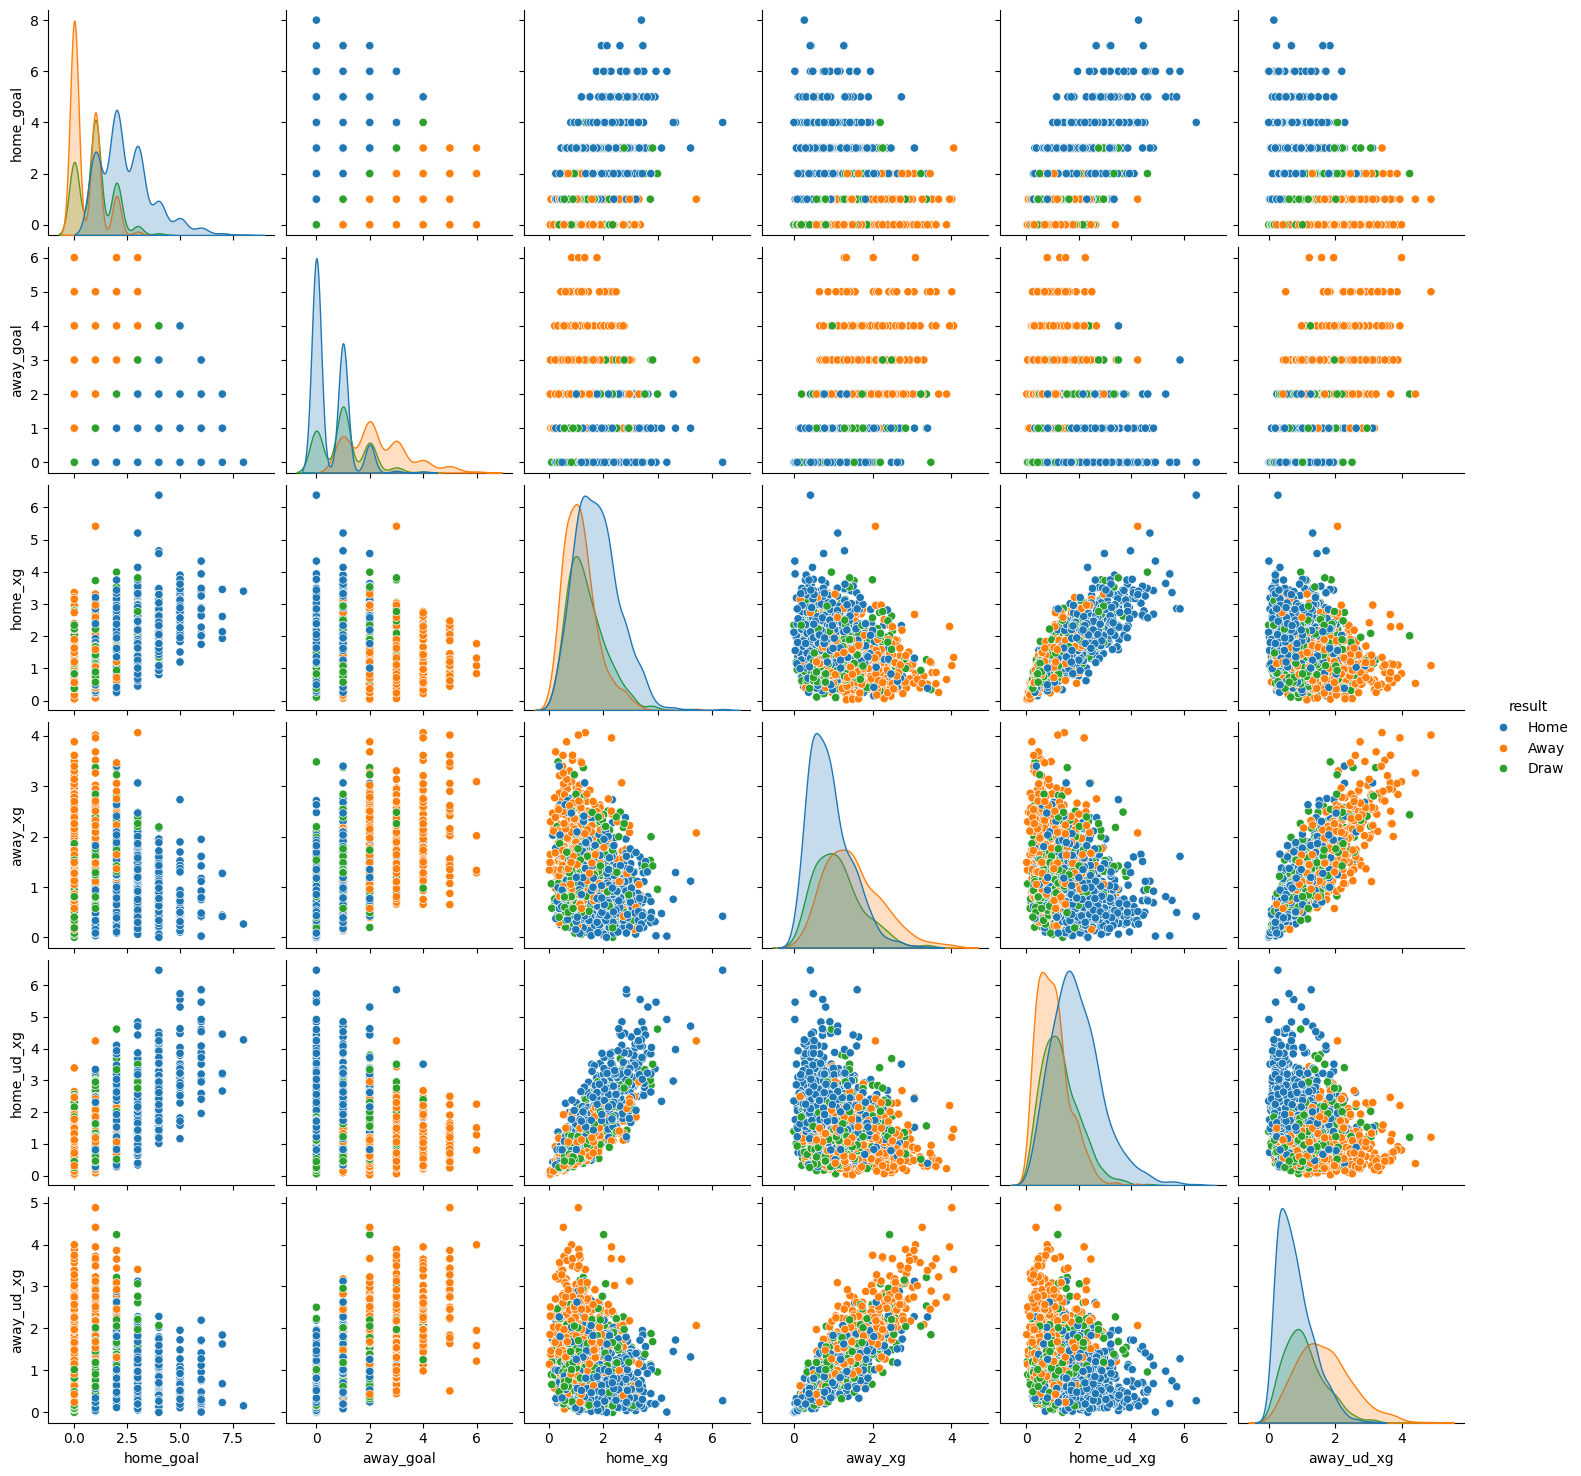

In [29]:
goal_metrics = [
    'home_goal', 'away_goal', 
    'home_xg', 'away_xg', 
    'home_ud_xg', 'away_ud_xg'
]

sns.pairplot(df[goal_metrics + ['result']], hue='result', diag_kind='kde')
plt.show()

[]

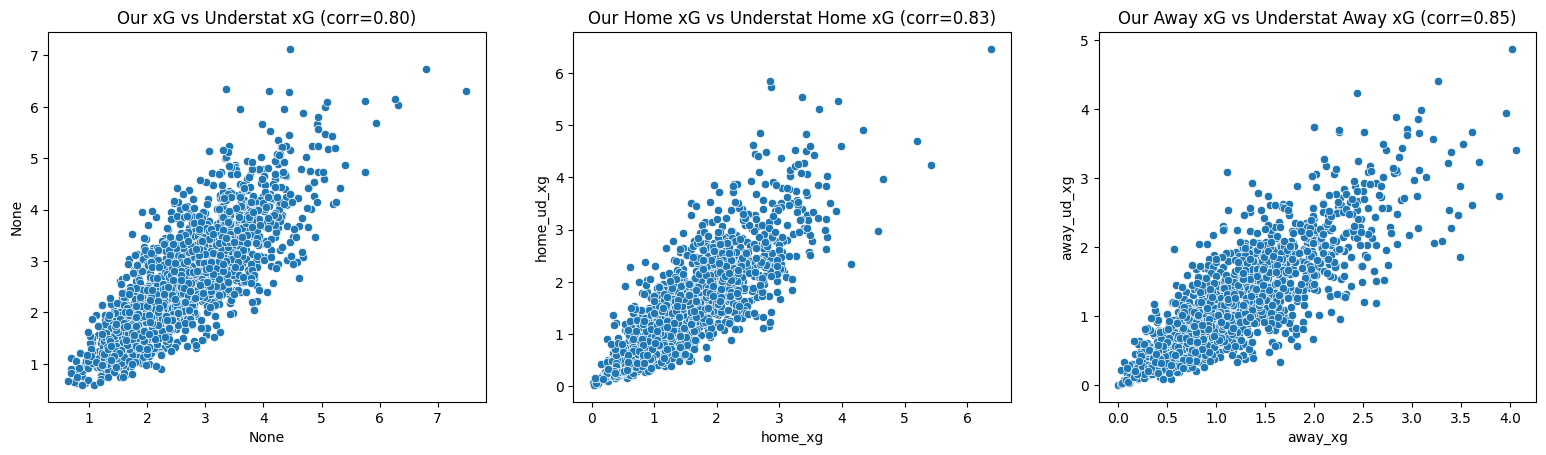

In [30]:
fig, axes = plt.subplots(ncols=3, nrows=1)

all_xg = df['home_xg'] + df['away_xg']
all_ud_xg = df['home_ud_xg'] + df['away_ud_xg']
sns.scatterplot(data=df, x=all_xg, y=all_ud_xg, ax=axes[0])
corr = all_xg.corr(all_ud_xg)
axes[0].set_title(f'Our xG vs Understat xG (corr={corr:.2f})')


sns.scatterplot(data=df, x='home_xg', y='home_ud_xg', ax=axes[1])
home_corr = df['home_xg'].corr(df['home_ud_xg'])
axes[1].set_title(f'Our Home xG vs Understat Home xG (corr={home_corr:.2f})')

sns.scatterplot(data=df, x='away_xg', y='away_ud_xg', ax=axes[2])
away_corr = df['away_xg'].corr(df['away_ud_xg'])
axes[2].set_title(f'Our Away xG vs Understat Away xG (corr={away_corr:.2f})')

fig.set_figwidth(fig.get_figwidth() * 3)
plt.plot()

## 3. Aggregate past performance

In [31]:
metrics = [
    'home_shot', 'away_shot',
    'home_sot', 'away_sot', 
    'home_pass', 'away_pass', 
    'home_corner', 'away_corner',
    'home_freekick', 'away_freekick',
    'home_foul', 'away_foul', 
    'home_yellow', 'away_yellow', 
    'home_red', 'away_red', 
    'home_offside', 'away_offside',
    'home_clearance', 'away_clearance',
    'home_save', 'away_save',
    'home_goal', 'away_goal', 
    'home_xg', 'away_xg', 
    'home_ud_xg', 'away_ud_xg',
    'home_point', 'away_point'
]

In [32]:
def team_agg_metrics(df, team_name, metrics=metrics, window=6, min_periods=None):
    home_data = df[(df['home_team'] == team_name)]
    home_data = home_data[['match_date'] + [metric for metric in metrics if 'home' in metric]]
    home_data.rename(columns={metric: metric.replace('home_', 'avg_') for metric in metrics}, inplace=True)
    home_xg_vector = df[(df['home_team'] == team_name)][['match_date', 'home_xg_vector', 'home_xg_time_vector']]
    home_xg_vector.rename(columns={'home_xg_vector': 'xg_vector', 'home_xg_time_vector': 'xg_time_vector'}, inplace=True)
    # print(home_xg_vector)
    
    away_data = df[(df['away_team'] == team_name)]
    away_data = away_data[['match_date'] + [metric for metric in metrics if 'away' in metric]]
    away_data.rename(columns={metric: metric.replace('away_', 'avg_') for metric in metrics}, inplace=True)
    away_xg_vector = df[(df['away_team'] == team_name)][['match_date', 'away_xg_vector', 'away_xg_time_vector']]
    away_xg_vector.rename(columns={'away_xg_vector': 'xg_vector', 'away_xg_time_vector': 'xg_time_vector'}, inplace=True)
    
    def manual_rolling_concat(series, window=window):
        concat = []
        for i in range(len(series)):
            if i < window:
                concat.append([])
            else:
                concat.append(np.concatenate(series[i-window:i].values))
        return concat
    
    team_data = pd.concat([home_data, away_data])
    team_data = team_data.sort_values('match_date', ascending=True)
    team_data.reset_index(drop=True, inplace=True)
    team_data = team_data.rolling(window=window, on='match_date', closed='left', min_periods=min_periods).mean()
    
    xg_data = pd.concat([home_xg_vector, away_xg_vector])
    xg_data = xg_data.sort_values('match_date', ascending=True)
    # print(xg_data) 
    team_data['xg_vector'] = manual_rolling_concat(xg_data['xg_vector'])
    team_data['xg_time_vector'] = manual_rolling_concat(xg_data['xg_time_vector'])
    
    
    team_data['team_name'] = team_name
    return team_data

def create_aggregate_table(df, metrics=metrics, window=6, min_periods=None):
    all_team_agg = pd.concat([team_agg_metrics(df, team_name, metrics, window, min_periods) for team_name in df['home_team'].unique()])
    
    agg_df = df[['match_date', 'home_team', 'away_team', 'result']]
    
    home_df = agg_df[['match_date', 'home_team']].merge(all_team_agg, left_on=['match_date','home_team'], right_on=['match_date','team_name'], how='left')
    home_df.rename(columns={col: col.replace('avg_', 'avg_home_') for col in home_df.columns}, inplace=True)
    home_df.rename(columns={'xg_vector': 'home_xg_vector', 'xg_time_vector': 'home_xg_time_vector'}, inplace=True)
    home_df.drop(columns=['team_name'], inplace=True)
    # display(home_df.head())
    
    away_df = agg_df[['match_date', 'away_team']].merge(all_team_agg, left_on=['match_date','away_team'], right_on=['match_date','team_name'], how='left')
    away_df.rename(columns={col: col.replace('avg_', 'avg_away_') for col in away_df.columns}, inplace=True)
    away_df.rename(columns={'xg_vector': 'away_xg_vector', 'xg_time_vector': 'away_xg_time_vector'}, inplace=True)
    away_df.drop(columns=['team_name'], inplace=True)
    # display(away_df.head())
    
    agg_df = agg_df.merge(home_df, on=['match_date','home_team'], how='left')
    agg_df = agg_df.merge(away_df, on=['match_date','away_team'], how='left')
    agg_df = agg_df[['match_date', 'home_team', 'away_team'] + [col for col in agg_df.columns if 'avg_' in col] + ['home_xg_vector', 'away_xg_vector', 'home_xg_time_vector', 'away_xg_time_vector', 'result']]

    return agg_df
    

### Data with team's performance from last 6 matches

In [33]:
agg_df = create_aggregate_table(df, window=6)
agg_df.reset_index(drop=True, inplace=True)
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   match_date           1826 non-null   datetime64[ns]
 1   home_team            1826 non-null   object        
 2   away_team            1826 non-null   object        
 3   avg_home_clearance   1533 non-null   float64       
 4   avg_home_corner      1533 non-null   float64       
 5   avg_home_foul        1533 non-null   float64       
 6   avg_home_freekick    1533 non-null   float64       
 7   avg_home_goal        1533 non-null   float64       
 8   avg_home_offside     1533 non-null   float64       
 9   avg_home_pass        1533 non-null   float64       
 10  avg_home_point       1533 non-null   float64       
 11  avg_home_red         1533 non-null   float64       
 12  avg_home_save        1533 non-null   float64       
 13  avg_home_shot        1533 non-nul

In [34]:
agg_df.tail()

match_date   home_team    away_team  avg_home_clearance  avg_home_corner  \
1821 2018-05-19      Nantes   Strasbourg           16.833333         5.166667   
1822 2018-05-19      Rennes  Montpellier           15.833333         5.166667   
1823 2018-05-19  St Etienne        Lille           15.333333         5.000000   
1824 2018-05-19    Toulouse     Guingamp           14.666667         5.333333   
1825 2018-05-19      Troyes       Monaco           17.833333         5.000000   

      avg_home_foul  avg_home_freekick  avg_home_goal  avg_home_offside  \
1821      13.500000           6.500000       0.833333          1.666667   
1822      10.500000          10.166667       1.500000          3.500000   
1823       8.333333          11.833333       1.000000          1.500000   
1824      14.166667          11.166667       1.166667          1.333333   
1825      12.333333          12.500000       1.166667          0.833333   

      avg_home_pass  ...  avg_away_shot  avg_away_sot  avg_away_ud_xg  \
1821     359.833333  ...      11.166667      3.666667        1.246204   
1822     410.000000  ...      14.833333      4.000000        0.768159   
1823     458.666667  ...      12.666667      4.500000        1.779030   
1824     305.666667  ...      15.500000      6.333333        1.976634   
1825     341.500000  ...      12.000000      2.666667        1.035984   

      avg_away_xg  avg_away_yellow  \
1821     1.252300         2.333333   
1822     0.901003         1.166667   
1823     1.332919         1.333333   
1824     1.724812         0.833333   
1825     1.114902         2.166667   

                                         home_xg_vector  \
1821  [0.03479395457446213, 0.04728015436830572, 0.0...   
1822  [0.02492967848341158, 0.0790833761004038, 0.52...   
1823  [0.09770891543927705, 0.09218798104655275, 0.7...   
1824  [0.14225721889277584, 0.032940108876950064, 0....   
1825  [0.12091450366294058, 0.026064317059543783, 0....   

                                         away_xg_vector  \
1821  [0.24402633589134626, 0.02007117608685321, 0.0...   
1822  [0.017953549730683235, 0.09093457521867132, 0....   
1823  [0.3015229745889018, 0.06460497493974202, 0.10...   
1824  [0.10779350346938021, 0.11723738179264061, 0.0...   
1825  [0.057645672440263605, 0.09365875448436405, 0....   

                                    home_xg_time_vector  \
1821  [1221.895283, 1360.312326, 1836.1749410000002,...   
1822  [310.235954, 1126.615634, 1577.321873, 2301.24...   
1823  [298.669563, 792.167846, 979.276732, 1251.8082...   
1824  [631.886224, 706.571786, 1653.207855, 2020.034...   
1825  [1679.825135, 1819.812862, 2487.243033, 3371.7...   

                                    away_xg_time_vector  result  
1821  [1382.023524, 1581.189781, 2415.009651, 2705.4...    Home  
1822  [1251.565557, 1688.757084, 2101.752903, 2922.5...    Draw  
1823  [779.671887, 1531.354828, 1536.35126, 1860.349...    Home  
1824  [1344.854032, 1371.018462, 2203.619739, 2234.4...    Home  
1825  [1259.066526, 2468.831812, 2665.182169, 4644.6...    Away  

[5 rows x 38 columns]

In [35]:
agg_df.dropna(inplace=True)

## 4. Compute Goal Difference (GD)

In [36]:
def team_goal_difference(df, team_name):
    home_data = df[(df['home_team'] == team_name)][['match_date','home_goal', 'away_goal']]
    # home_data['goal_scored'] = home_data['home_goal']
    # home_data['goal_conceded'] = home_data['away_goal']
    home_data['goal_diff'] = home_data['home_goal'] - home_data['away_goal']
    home_data = home_data[['match_date', 'goal_diff']]
    # home_data.rename(columns={metric: metric.replace('home_', 'avg_') for metric in metrics}, inplace=True)
    
    away_data = df[(df['away_team'] == team_name)][['match_date','home_goal', 'away_goal']]
    # away_data['goal_scored'] = away_data['away_goal']
    # away_data['goal_conceded'] = away_data['home_goal']
    away_data['goal_diff'] = away_data['away_goal'] - away_data['home_goal']
    away_data = away_data[['match_date', 'goal_diff']]
    # away_data.rename(columns={metric: metric.replace('away_', 'avg_') for metric in metrics}, inplace=True)
    
    team_data = pd.concat([home_data, away_data])
    team_data = team_data.sort_values('match_date', ascending=True)
    team_data.reset_index(drop=True, inplace=True)

    team_data = team_data.rolling(window=38, on='match_date', closed='left', min_periods=1).sum()
    team_data['team_name'] = team_name
    return team_data

In [37]:
def add_goal_difference(df):
    all_team_goal_diff = pd.concat([team_goal_difference(match_statistics, team_name) for team_name in df['home_team'].unique()])
    
    home_df = df[['match_date', 'home_team']].merge(all_team_goal_diff, left_on=['match_date','home_team'], right_on=['match_date','team_name'], how='left')
    home_df.rename(columns={col: col.replace('goal_diff', 'home_goal_diff') for col in home_df.columns}, inplace=True)
    home_df.drop(columns=['team_name'], inplace=True)
    # display(home_df.head())
    
    away_df = df[['match_date', 'away_team']].merge(all_team_goal_diff, left_on=['match_date','away_team'], right_on=['match_date','team_name'], how='left')
    away_df.rename(columns={col: col.replace('goal_diff', 'away_goal_diff') for col in away_df.columns}, inplace=True)
    away_df.drop(columns=['team_name'], inplace=True)
    # display(away_df.head())
    
    all_df = df.merge(home_df, on=['match_date','home_team'], how='left')
    all_df = all_df.merge(away_df, on=['match_date','away_team'], how='left')

    return all_df

In [38]:
all_team_gd = pd.concat([team_goal_difference(match_statistics, team_name) for team_name in match_statistics['home_team'].unique()])
all_team_gd.reset_index(drop=True, inplace=True)
all_team_gd

match_date  goal_diff   team_name
0    2017-08-18        NaN     Leganes
1    2017-08-27        1.0     Leganes
2    2017-09-08        2.0     Leganes
3    2017-09-15        1.0     Leganes
4    2017-09-20        0.0     Leganes
...         ...        ...         ...
3647 2018-04-21      -20.0  Strasbourg
3648 2018-04-28      -22.0  Strasbourg
3649 2018-05-06      -22.0  Strasbourg
3650 2018-05-12      -23.0  Strasbourg
3651 2018-05-19      -22.0  Strasbourg

[3652 rows x 3 columns]

In [39]:
all_feats = add_goal_difference(agg_df)
all_feats.reset_index(drop=True, inplace=True)


In [40]:
all_feats = all_feats[['match_date', 'home_team', 'away_team'] + [f'avg_{metric}' for metric in metrics] + ['home_goal_diff', 'away_goal_diff', 'home_xg_vector', 'away_xg_vector', 'home_xg_time_vector', 'away_xg_time_vector', 'result']]
all_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   match_date           1531 non-null   datetime64[ns]
 1   home_team            1531 non-null   object        
 2   away_team            1531 non-null   object        
 3   avg_home_shot        1531 non-null   float64       
 4   avg_away_shot        1531 non-null   float64       
 5   avg_home_sot         1531 non-null   float64       
 6   avg_away_sot         1531 non-null   float64       
 7   avg_home_pass        1531 non-null   float64       
 8   avg_away_pass        1531 non-null   float64       
 9   avg_home_corner      1531 non-null   float64       
 10  avg_away_corner      1531 non-null   float64       
 11  avg_home_freekick    1531 non-null   float64       
 12  avg_away_freekick    1531 non-null   float64       
 13  avg_home_foul        1531 non-nul

In [41]:
all_feats.head()

match_date   home_team        away_team  avg_home_shot  avg_away_shot  \
0 2017-09-29  Celta Vigo           Girona      12.333333      12.500000   
1 2017-09-30   Deportivo           Getafe      13.500000      12.333333   
2 2017-09-30     Leganes  Atletico Madrid      10.833333      12.666667   
3 2017-09-30     Levante           Alaves      12.166667       9.000000   
4 2017-09-30     Sevilla           Malaga      10.833333      11.000000   

   avg_home_sot  avg_away_sot  avg_home_pass  avg_away_pass  avg_home_corner  \
0      3.500000      3.166667     492.333333     347.333333         5.333333   
1      4.333333      3.833333     342.000000     275.166667         4.833333   
2      5.000000      5.000000     325.666667     418.500000         2.666667   
3      3.666667      2.666667     298.000000     293.000000         4.500000   
4      5.000000      4.166667     520.000000     399.500000         6.166667   

   ...  avg_away_ud_xg  avg_home_point  avg_away_point  home_goal_diff  \
0  ...        1.435133        1.166667        0.833333             2.0   
1  ...        1.037020        0.666667        1.333333            -8.0   
2  ...        1.230867        1.666667        2.333333             2.0   
3  ...        0.587910        1.500000        0.000000             0.0   
4  ...        0.960092        2.166667        0.166667             4.0   

   away_goal_diff                                     home_xg_vector  \
0            -5.0  [0.05315945417262, 0.08706667660013036, 0.0343...   
1             3.0  [0.09451974843490732, 0.11948241093346787, 0.5...   
2             8.0  [0.04605354293362127, 0.1331003080732824, 0.06...   
3            -9.0  [0.11650468250248687, 0.05197437786303828, 0.0...   
4           -10.0  [0.15010169722802702, 0.6256478933958487, 0.07...   

                                      away_xg_vector  \
0  [0.02038014185396191, 0.026675047007794783, 0....   
1  [0.11309811373122937, 0.03439931448848128, 0.0...   
2  [0.02321784876319893, 0.02272804784183438, 0.0...   
3  [0.08093467846588802, 0.7399004900871722, 0.04...   
4  [0.15145944351477256, 0.02350404988765635, 0.2...   

                                 home_xg_time_vector  \
0  [269.21093, 756.110394, 1084.59091, 1300.58282...   
1  [313.10862599999996, 421.549125, 456.771684000...   
2  [273.464051, 1202.144567, 1394.765361, 1398.67...   
3  [57.771186, 60.727239, 948.872079, 1028.2768, ...   
4  [1213.78689, 1542.617168, 1727.444833, 1862.26...   

                                 away_xg_time_vector  result  
0  [104.97102799999999, 353.68608800000004, 517.3...    Draw  
1  [482.525167, 1481.710729, 1562.637261, 2909.90...    Home  
2  [71.481448, 818.3763960000001, 2073.321265, 30...    Draw  
3  [734.630153, 966.8881369999999, 1833.506613, 2...    Away  
4  [572.214715, 1440.417623, 1789.883241, 3769.73...    Home  

[5 rows x 40 columns]

In [42]:
import pickle

with open('../Data/match_all_feats.pkl', 'wb') as file:
    pickle.dump(all_feats, file)

# Feature Selection

## 1. Features by Match Result

### Visual check with KDE plot

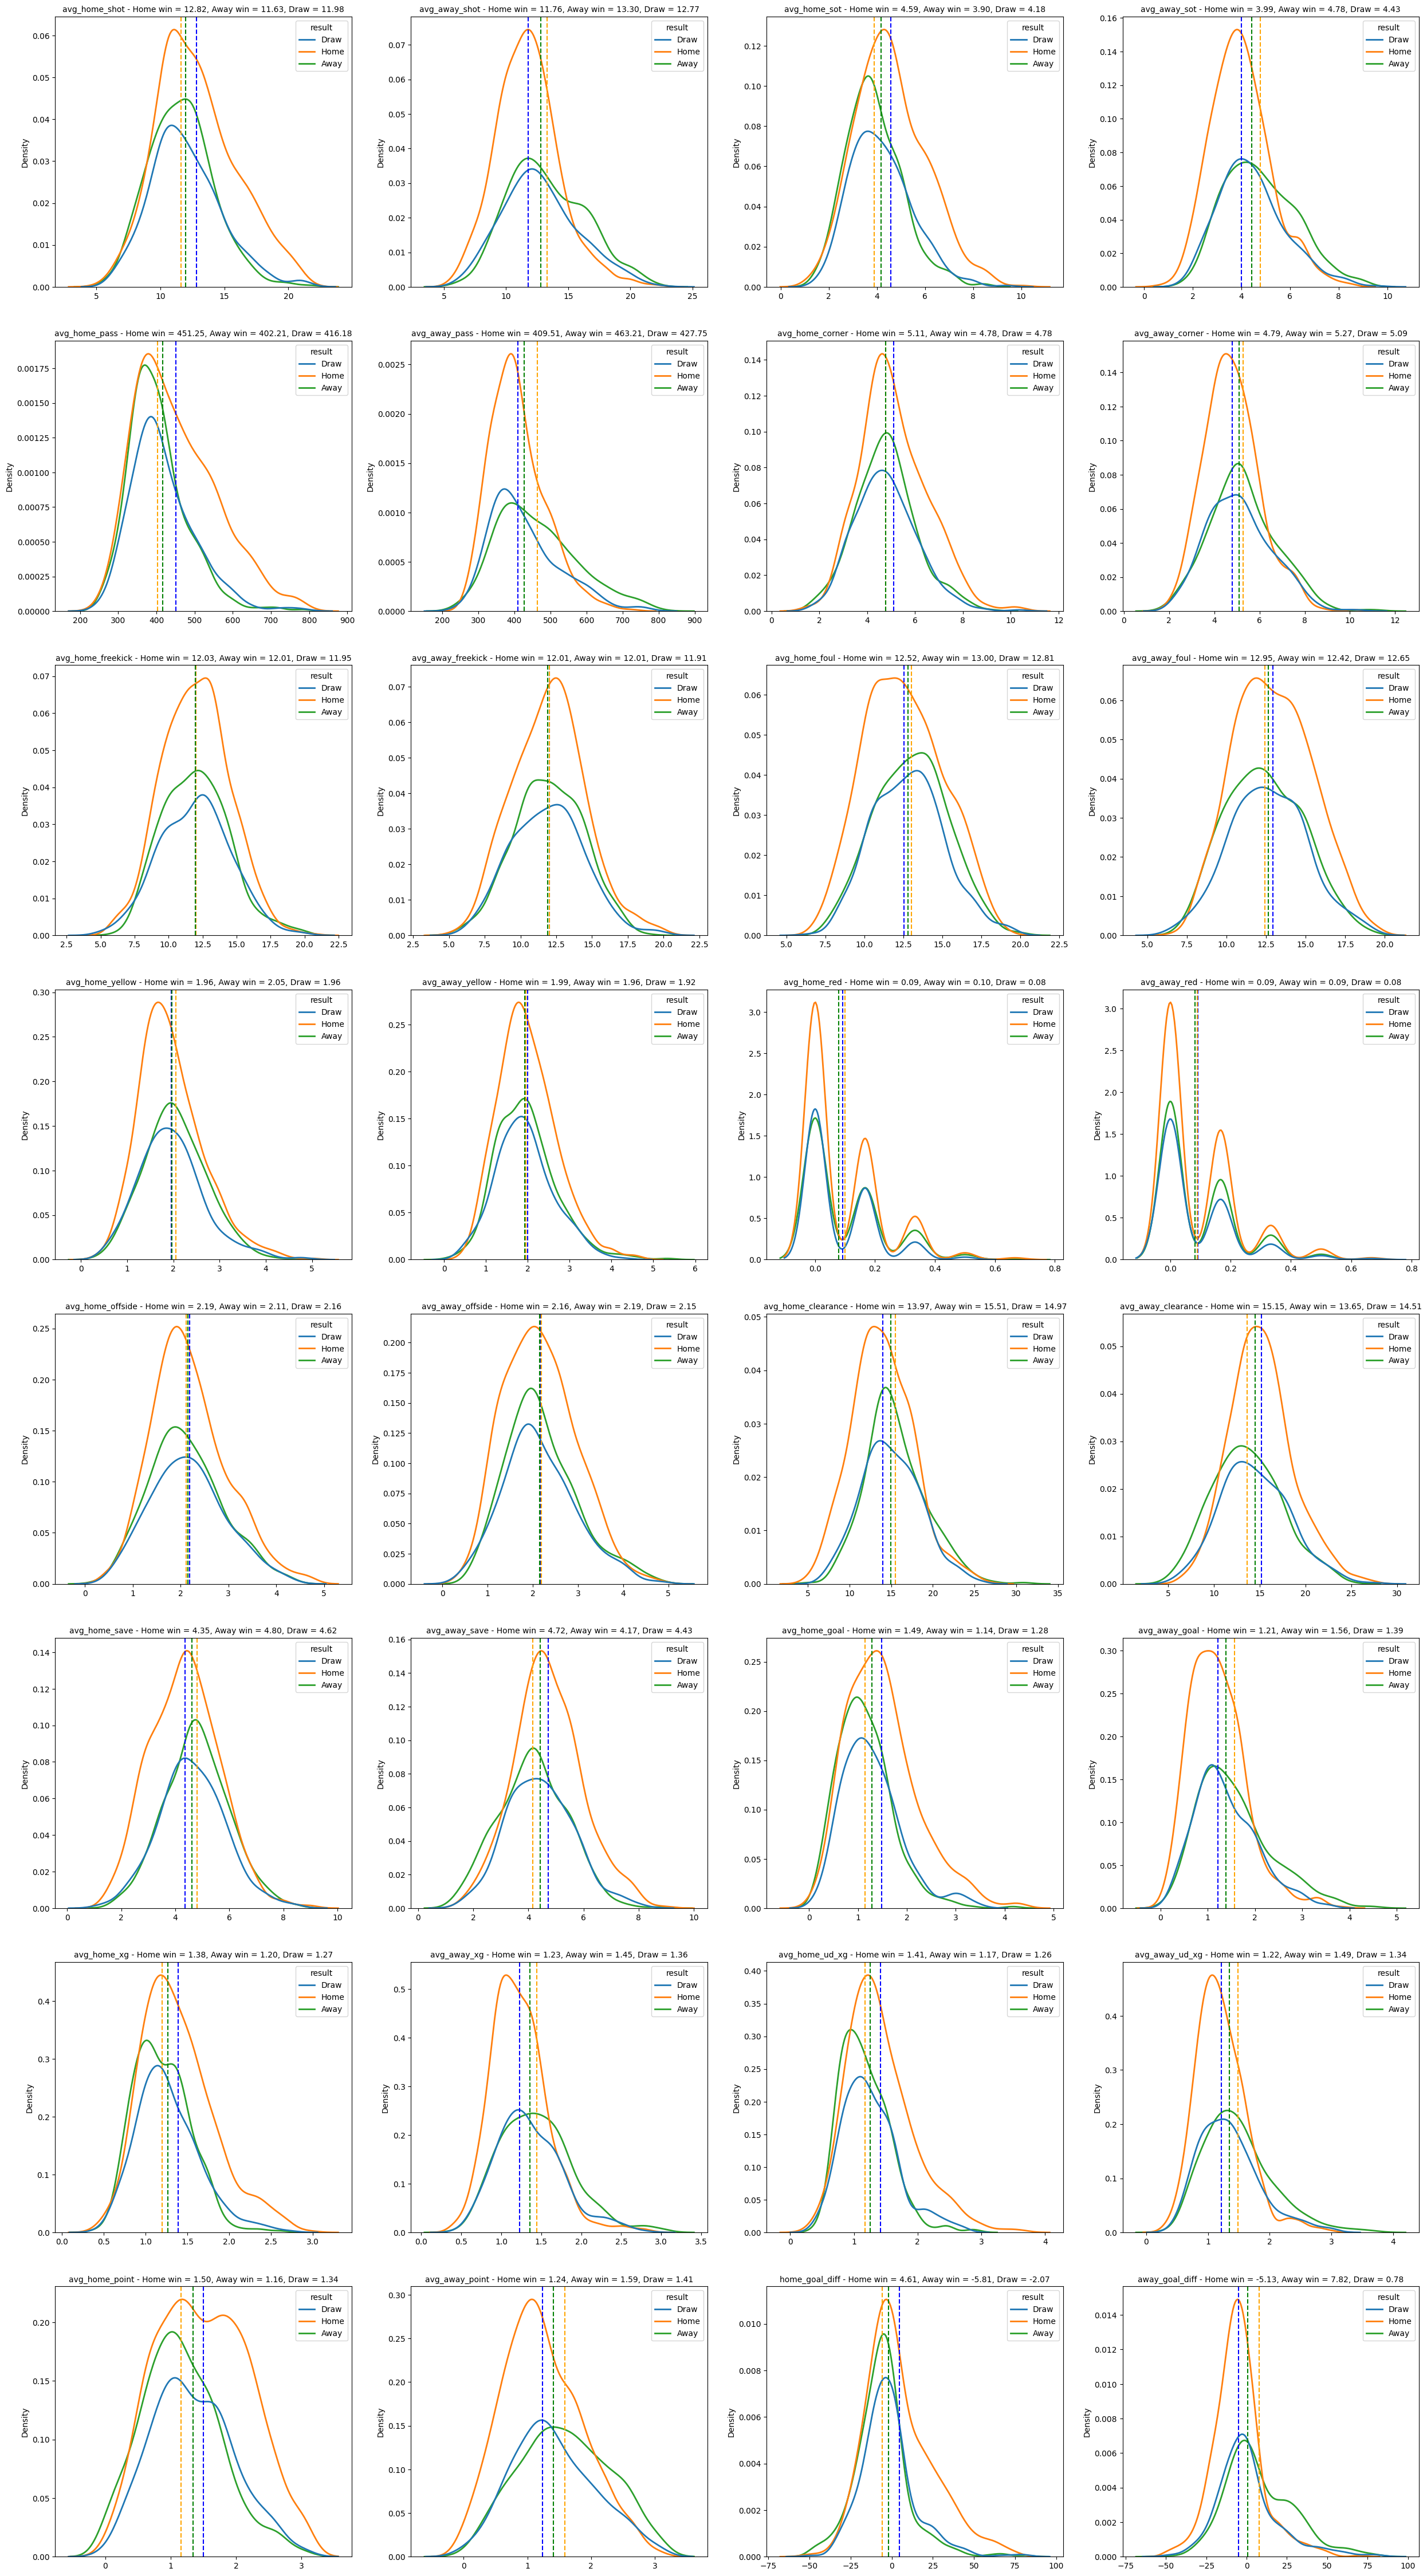

In [43]:
num_feats = [col for col in all_feats.columns if col not in ['match_date', 'home_team', 'away_team', 'home_xg_vector', 'away_xg_vector', 'home_xg_time_vector', 'away_xg_time_vector', 'result']]

nrows = len(num_feats)//4 if len(num_feats)%4==0 else len(num_feats)//4+1
fig, axes = plt.subplots(ncols=4,nrows=nrows)

for idx,col in enumerate(num_feats):
    ax1 = axes[idx//4][idx%4]
    sns.kdeplot(data=all_feats,x=col,color="g", hue='result', ax=ax1,lw=2)
    home_mean = all_feats[all_feats['result']=='Home'][col].mean()
    away_mean = all_feats[all_feats['result']=='Away'][col].mean()
    draw_mean = all_feats[all_feats['result']=='Draw'][col].mean()
    ax1.axvline(home_mean,ls="dashed",color="b")
    ax1.axvline(away_mean,ls="dashed",color="orange")
    ax1.axvline(draw_mean,ls="dashed",color="g")
    ax1.set_title(f"{col} - Home win = {home_mean:.2f}, Away win = {away_mean:.2f}, Draw = {draw_mean:.2f}", fontsize=10)
    ax1.set_xlabel("")
    
fig.set_figheight(fig.get_figheight()*nrows*1.5)
fig.set_figwidth(fig.get_figwidth()*4*1.2)

plt.show()

### Kolmogorov-Smirnoff test

Conduct a Kolmogorov-Smirnoff test to determine if any of the Home win and Away win groups come from the same distributions at the 0.1% significance level. It might be worthwhile printing the results for all features including the $p$-$value$. 

In [44]:
from scipy.stats import ks_2samp

alpha = 0.001

not_sig_feats = [] 

for idx, col in enumerate(num_feats):
    _,p_value_ks = ks_2samp(all_feats[all_feats['result']=="Home"][col].dropna(),all_feats[all_feats['result']=="Away"][col].dropna())
    if p_value_ks < alpha:
        print(f"KS: The results when Home team win and Away team win distributions are significantly different for {col} at the {100*alpha}% significance level, p-value = {p_value_ks}")
    else:
        print(f"KS: The results when Home team win and Away team win distributions are not significantly different for {col} at the {100*alpha}% significance level, p-value = {p_value_ks}")
        not_sig_feats.append(col)


KS: The results when Home team win and Away team win distributions are significantly different for avg_home_shot at the 0.1% significance level, p-value = 1.5464159908642702e-07
KS: The results when Home team win and Away team win distributions are significantly different for avg_away_shot at the 0.1% significance level, p-value = 8.242738502597217e-13
KS: The results when Home team win and Away team win distributions are significantly different for avg_home_sot at the 0.1% significance level, p-value = 8.816502092770046e-13
KS: The results when Home team win and Away team win distributions are significantly different for avg_away_sot at the 0.1% significance level, p-value = 3.064887144909717e-13
KS: The results when Home team win and Away team win distributions are significantly different for avg_home_pass at the 0.1% significance level, p-value = 1.727356129062422e-13
KS: The results when Home team win and Away team win distributions are significantly different for avg_away_pass at 

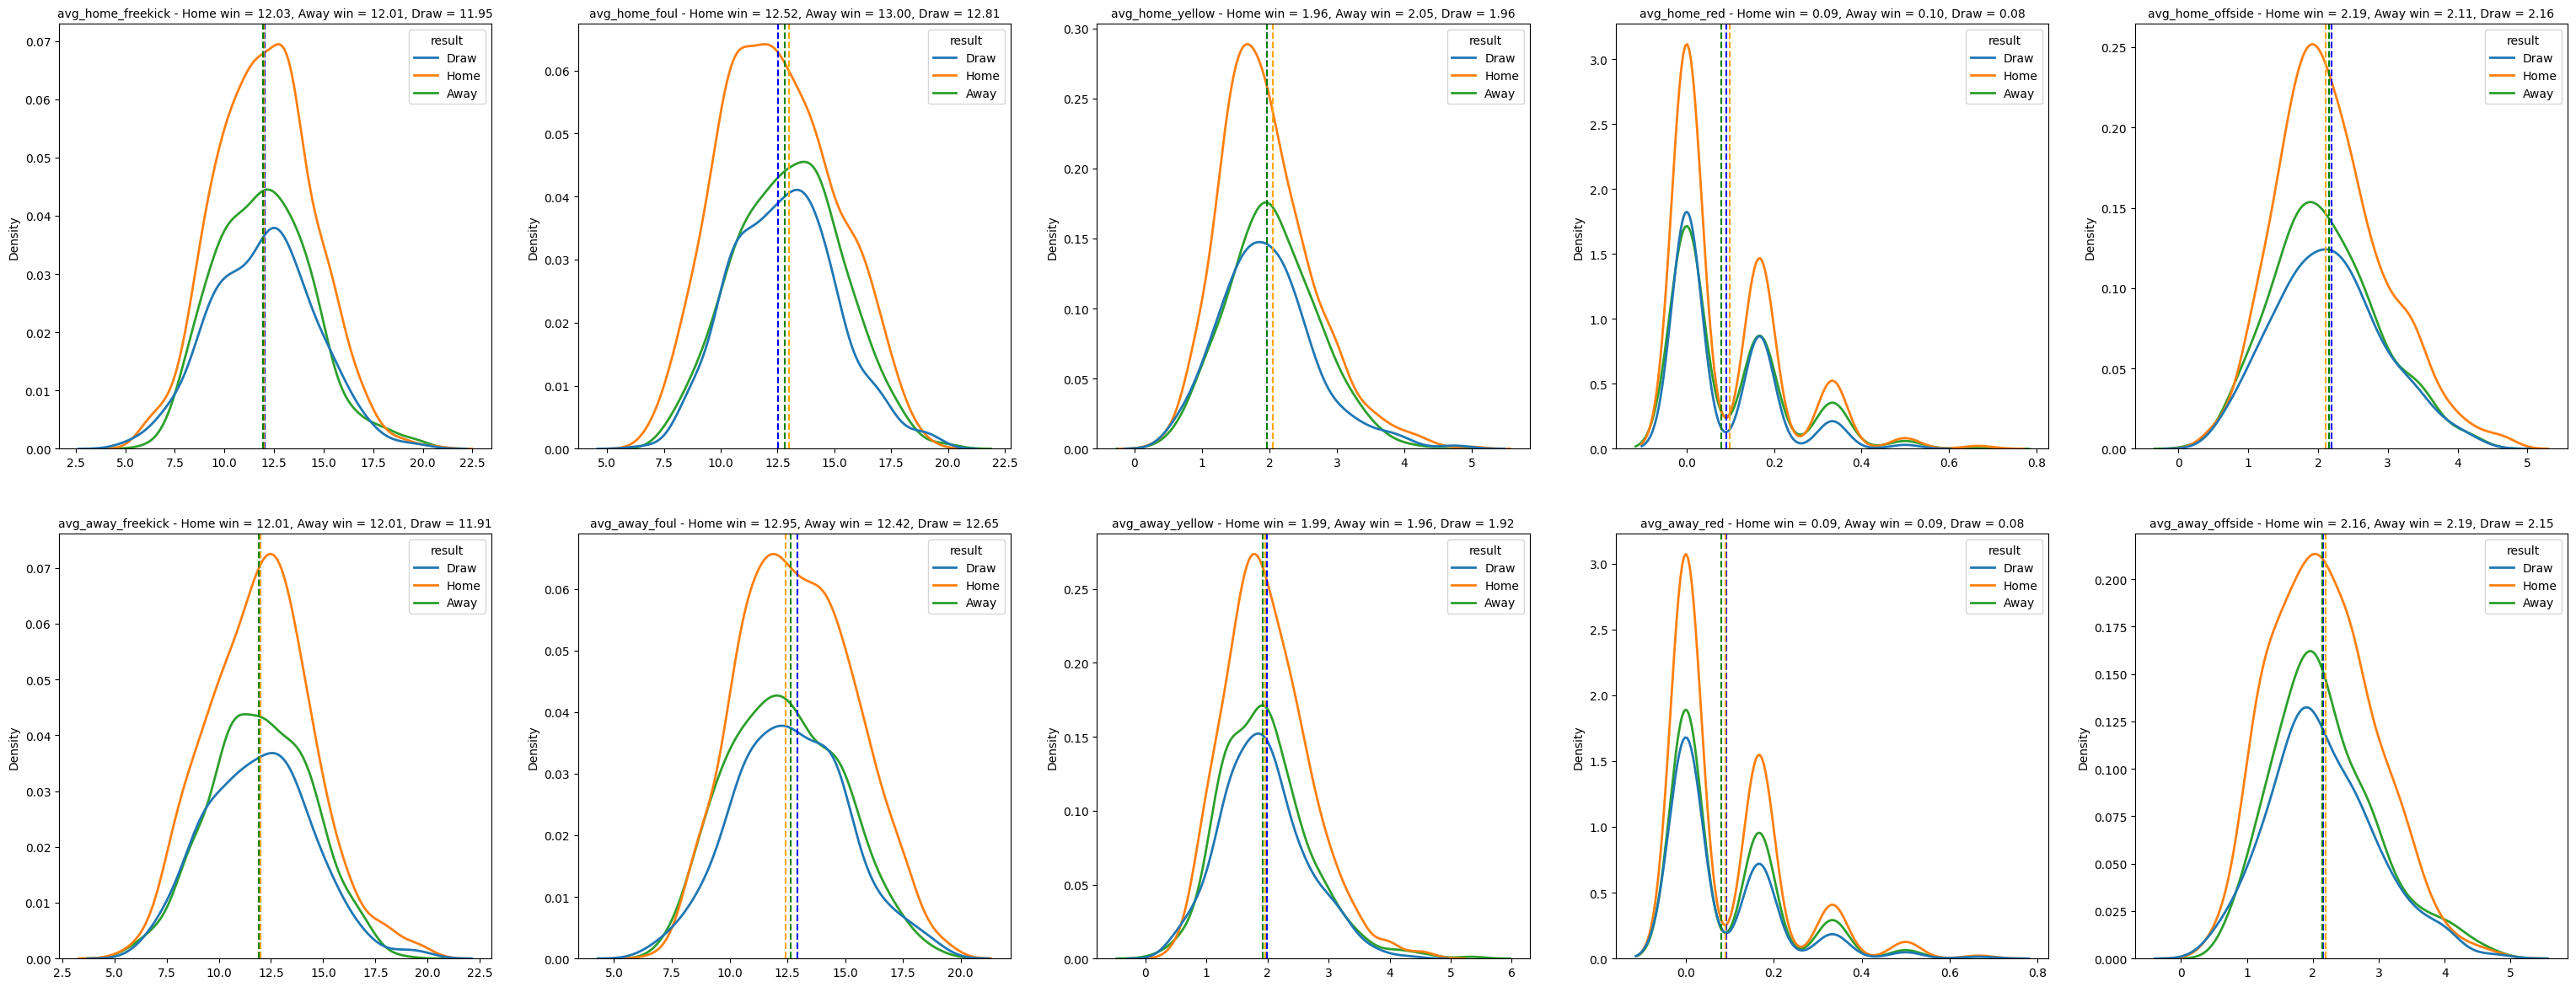

In [45]:
not_sig_feats = [
    'avg_home_freekick', 'avg_away_freekick',
    'avg_home_foul', 'avg_away_foul',
    'avg_home_yellow', 'avg_away_yellow',
    'avg_home_red', 'avg_away_red',
    'avg_home_offside', 'avg_away_offside'
]

fig, axes = plt.subplots(ncols=5,nrows=2)

for idx,col in enumerate(not_sig_feats):
    ax1 = axes[idx%2][idx//2]
    sns.kdeplot(data=all_feats,x=col,color="g", hue='result', ax=ax1,lw=2)
    home_mean = all_feats[all_feats['result']=='Home'][col].mean()
    away_mean = all_feats[all_feats['result']=='Away'][col].mean()
    draw_mean = all_feats[all_feats['result']=='Draw'][col].mean()
    ax1.axvline(home_mean,ls="dashed",color="b")
    ax1.axvline(away_mean,ls="dashed",color="orange")
    ax1.axvline(draw_mean,ls="dashed",color="g")
    ax1.set_title(f"{col} - Home win = {home_mean:.2f}, Away win = {away_mean:.2f}, Draw = {draw_mean:.2f}", fontsize=10)
    ax1.set_xlabel("")
    
fig.set_figheight(fig.get_figheight()*2*1.5)
fig.set_figwidth(fig.get_figwidth()*5*1.2)

plt.show()

In [46]:
filtered_feats = all_feats.drop(columns=[col for col in not_sig_feats])
filtered_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   match_date           1531 non-null   datetime64[ns]
 1   home_team            1531 non-null   object        
 2   away_team            1531 non-null   object        
 3   avg_home_shot        1531 non-null   float64       
 4   avg_away_shot        1531 non-null   float64       
 5   avg_home_sot         1531 non-null   float64       
 6   avg_away_sot         1531 non-null   float64       
 7   avg_home_pass        1531 non-null   float64       
 8   avg_away_pass        1531 non-null   float64       
 9   avg_home_corner      1531 non-null   float64       
 10  avg_away_corner      1531 non-null   float64       
 11  avg_home_clearance   1531 non-null   float64       
 12  avg_away_clearance   1531 non-null   float64       
 13  avg_home_save        1531 non-nul

## 2. Correlation Matrix

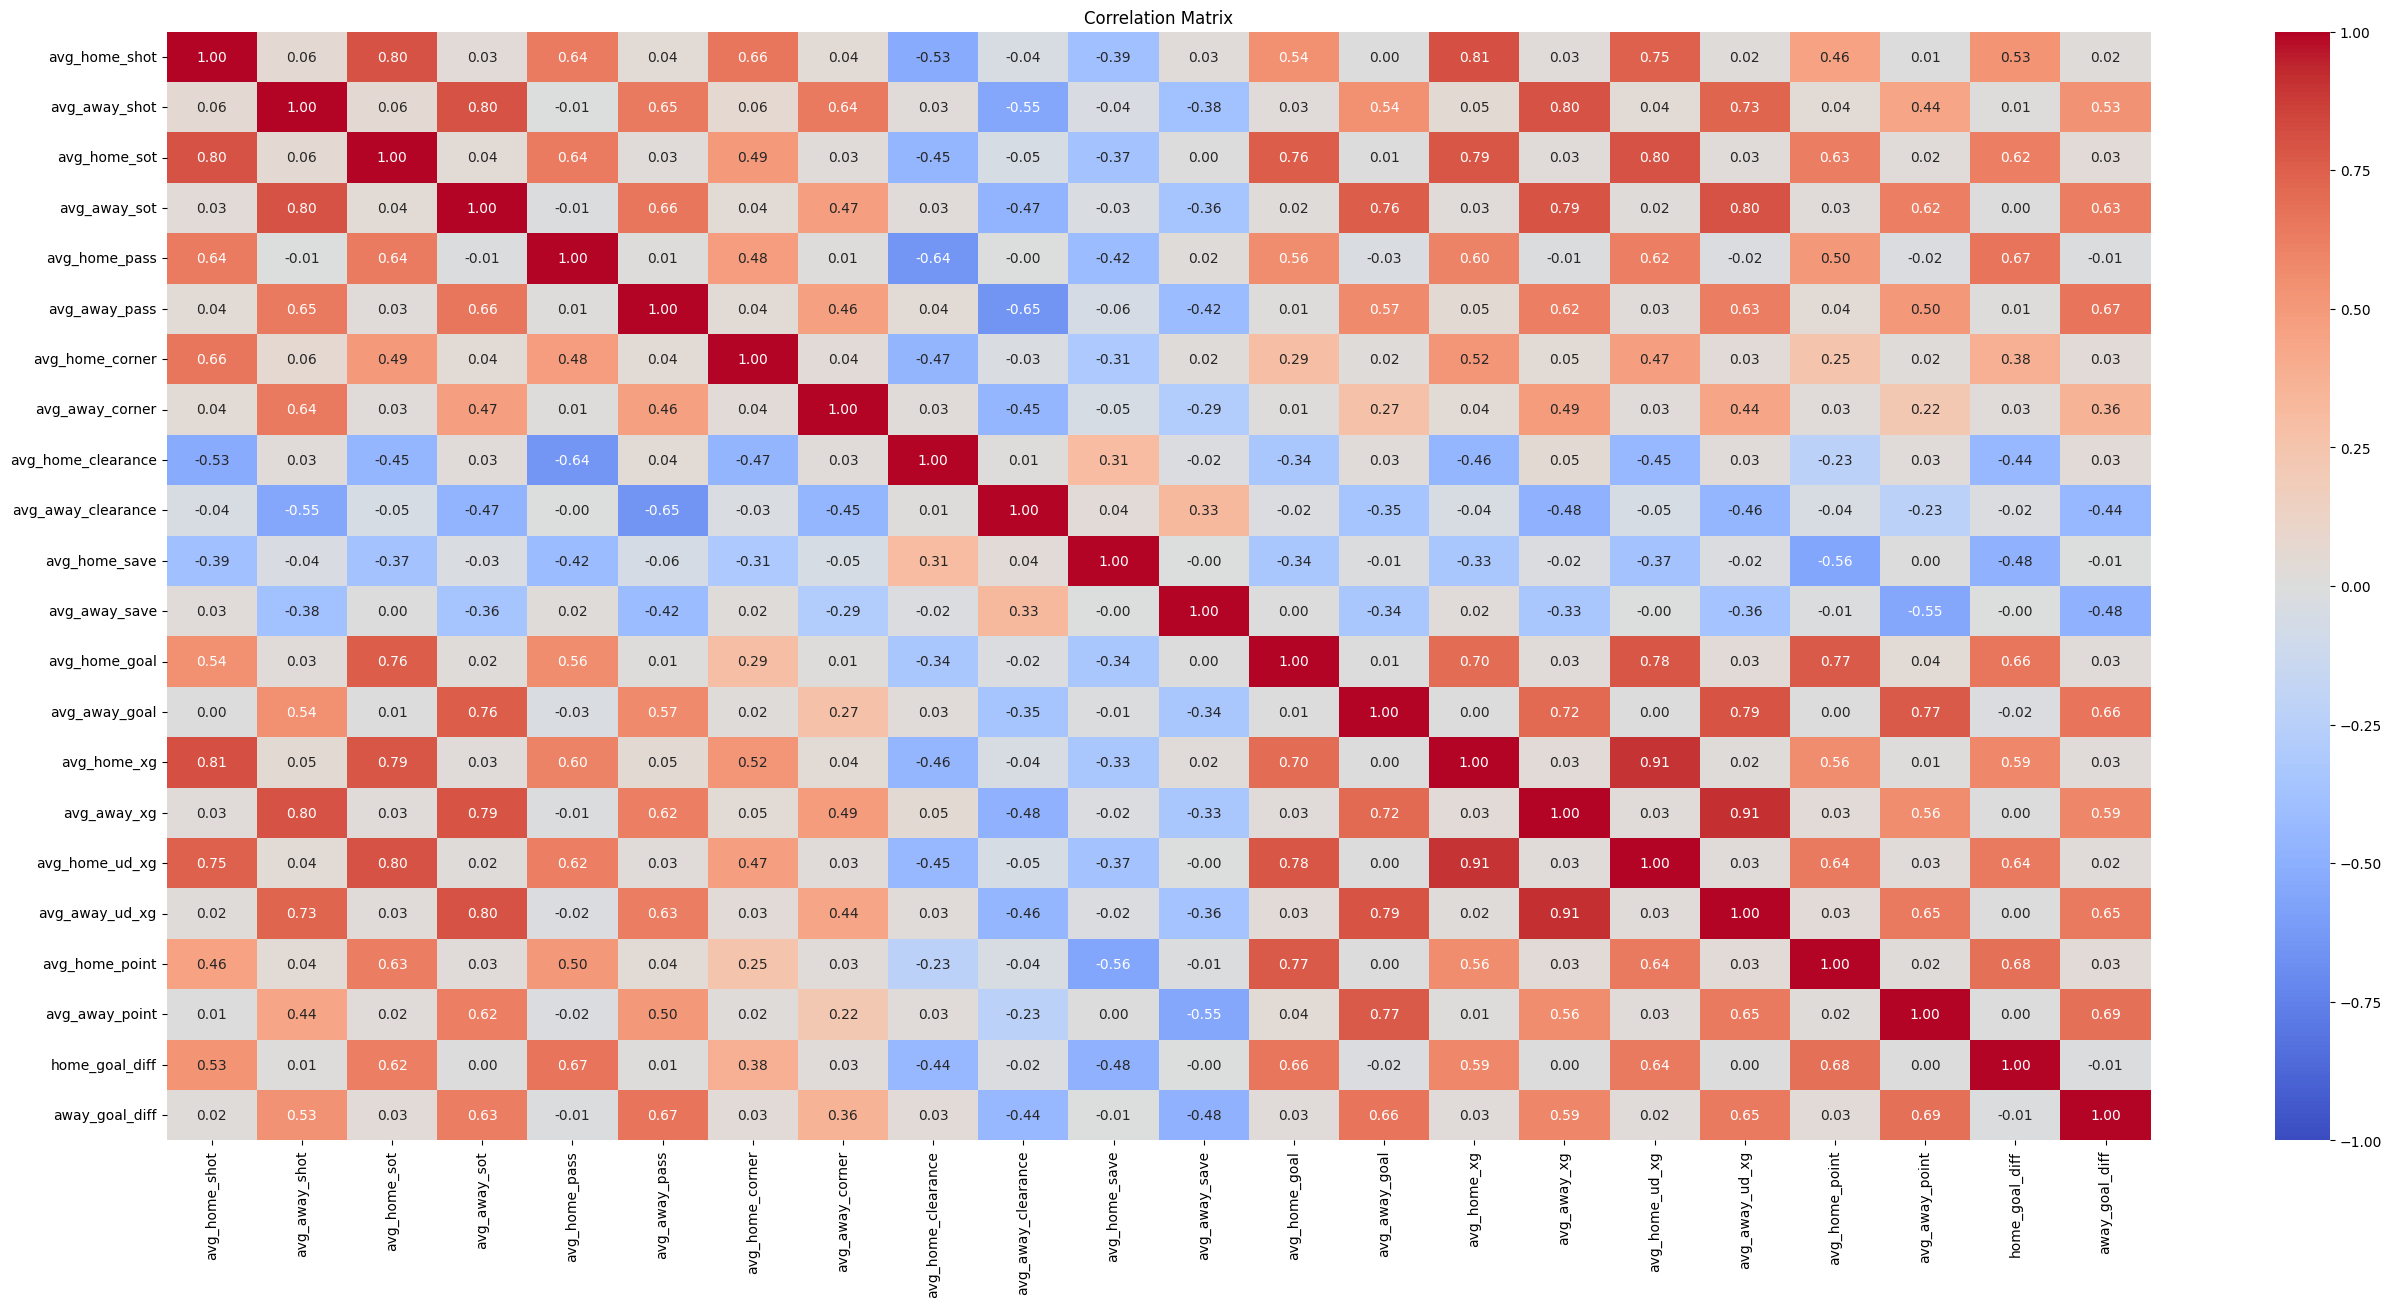

In [47]:
corr_feats = [col for col in filtered_feats.columns if col not in ['match_date', 'home_team', 'away_team', 'home_xg_vector', 'away_xg_vector', 'home_xg_time_vector', 'away_xg_time_vector', 'result']]
corr = filtered_feats[corr_feats].corr()

fig, axes = plt.subplots(ncols=1, nrows=1)

sns.heatmap(corr, annot=True, cmap='coolwarm', xticklabels=True, yticklabels=True, ax=axes, fmt='.2f', center=0, vmin=-1, vmax=1)
axes.set_title('Correlation Matrix')
fig.set_figheight(fig.get_figheight() * 3)
fig.set_figwidth(fig.get_figwidth() * 5)

plt.show()

## 3. RFE

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder

team_encoder = LabelEncoder()
team_encoder.fit(dim_team['team_name'])

# with open('../Models/Predictive Models/team_encoder.pkl', 'wb') as file:
#     pickle.dump(team_encoder, file)

rfe_exclude = ['match_date', 'avg_home_xg', 'avg_away_xg', 'avg_home_ud_xg', 'avg_away_ud_xg', 'home_xg_vector', 'away_xg_vector', 'home_xg_time_vector', 'away_xg_time_vector', 'result']


X = filtered_feats.drop(columns=rfe_exclude)
X['home_team'] = team_encoder.transform(X['home_team'])
X['away_team'] = team_encoder.transform(X['away_team'])
y = filtered_feats['result']

lr = LogisticRegression()

rfe = RFECV(estimator=lr, cv=10)
rfe = rfe.fit(X, y)

selected_features = X.columns[rfe.support_]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['avg_home_shot', 'avg_away_shot', 'avg_home_sot', 'avg_away_sot',
       'avg_home_pass', 'avg_away_pass', 'avg_home_corner', 'avg_away_corner',
       'avg_home_clearance', 'avg_away_clearance', 'avg_home_save',
       'avg_away_save', 'avg_home_goal', 'avg_away_goal', 'avg_home_point',
       'avg_away_point', 'home_goal_diff', 'away_goal_diff'],
      dtype='object')


Text(0, 0.5, 'Mean test accuracy')

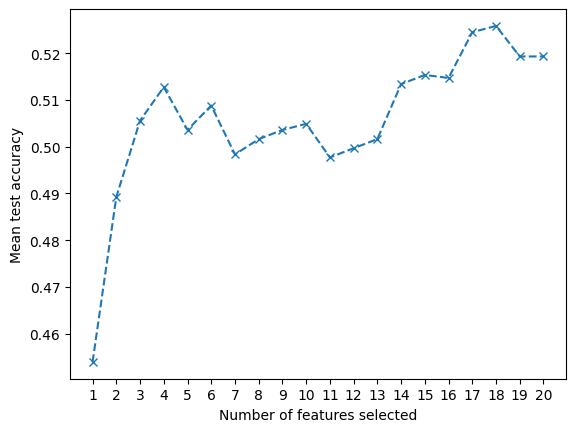

In [49]:
rfe_score = rfe.cv_results_['mean_test_score']
n_feats = list(range(1, len(rfe_score) + 1))

plt.figure()
plt.plot(n_feats, rfe_score, marker='x', ls='--')
plt.xticks(n_feats)
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")

In [50]:
final_data = filtered_feats[['home_team', 'away_team'] + list(selected_features) + rfe_exclude]  # Keep team names to merge with bookmaker data
final_data.drop(columns=['match_date'], inplace=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   home_team            1531 non-null   object 
 1   away_team            1531 non-null   object 
 2   avg_home_shot        1531 non-null   float64
 3   avg_away_shot        1531 non-null   float64
 4   avg_home_sot         1531 non-null   float64
 5   avg_away_sot         1531 non-null   float64
 6   avg_home_pass        1531 non-null   float64
 7   avg_away_pass        1531 non-null   float64
 8   avg_home_corner      1531 non-null   float64
 9   avg_away_corner      1531 non-null   float64
 10  avg_home_clearance   1531 non-null   float64
 11  avg_away_clearance   1531 non-null   float64
 12  avg_home_save        1531 non-null   float64
 13  avg_away_save        1531 non-null   float64
 14  avg_home_goal        1531 non-null   float64
 15  avg_away_goal        1531 non-null   f

In [51]:
final_data.head()

home_team        away_team  avg_home_shot  avg_away_shot  avg_home_sot  \
0  Celta Vigo           Girona      12.333333      12.500000      3.500000   
1   Deportivo           Getafe      13.500000      12.333333      4.333333   
2     Leganes  Atletico Madrid      10.833333      12.666667      5.000000   
3     Levante           Alaves      12.166667       9.000000      3.666667   
4     Sevilla           Malaga      10.833333      11.000000      5.000000   

   avg_away_sot  avg_home_pass  avg_away_pass  avg_home_corner  \
0      3.166667     492.333333     347.333333         5.333333   
1      3.833333     342.000000     275.166667         4.833333   
2      5.000000     325.666667     418.500000         2.666667   
3      2.666667     298.000000     293.000000         4.500000   
4      4.166667     520.000000     399.500000         6.166667   

   avg_away_corner  ...  away_goal_diff  avg_home_xg  avg_away_xg  \
0         5.333333  ...            -5.0     1.098068     1.046499   
1         4.833333  ...             3.0     1.348393     1.026756   
2         3.333333  ...             8.0     1.092823     0.989806   
3         2.666667  ...            -9.0     1.332333     0.626754   
4         4.500000  ...           -10.0     1.234509     1.024673   

   avg_home_ud_xg  avg_away_ud_xg  \
0        1.240646        1.435133   
1        1.187398        1.037020   
2        1.066449        1.230867   
3        1.257932        0.587910   
4        1.615152        0.960092   

                                      home_xg_vector  \
0  [0.05315945417262, 0.08706667660013036, 0.0343...   
1  [0.09451974843490732, 0.11948241093346787, 0.5...   
2  [0.04605354293362127, 0.1331003080732824, 0.06...   
3  [0.11650468250248687, 0.05197437786303828, 0.0...   
4  [0.15010169722802702, 0.6256478933958487, 0.07...   

                                      away_xg_vector  \
0  [0.02038014185396191, 0.026675047007794783, 0....   
1  [0.11309811373122937, 0.03439931448848128, 0.0...   
2  [0.02321784876319893, 0.02272804784183438, 0.0...   
3  [0.08093467846588802, 0.7399004900871722, 0.04...   
4  [0.15145944351477256, 0.02350404988765635, 0.2...   

                                 home_xg_time_vector  \
0  [269.21093, 756.110394, 1084.59091, 1300.58282...   
1  [313.10862599999996, 421.549125, 456.771684000...   
2  [273.464051, 1202.144567, 1394.765361, 1398.67...   
3  [57.771186, 60.727239, 948.872079, 1028.2768, ...   
4  [1213.78689, 1542.617168, 1727.444833, 1862.26...   

                                 away_xg_time_vector  result  
0  [104.97102799999999, 353.68608800000004, 517.3...    Draw  
1  [482.525167, 1481.710729, 1562.637261, 2909.90...    Home  
2  [71.481448, 818.3763960000001, 2073.321265, 30...    Draw  
3  [734.630153, 966.8881369999999, 1833.506613, 2...    Away  
4  [572.214715, 1440.417623, 1789.883241, 3769.73...    Home  

[5 rows x 29 columns]

In [52]:
import pickle

with open('../Data/match_final_data.pkl', 'wb') as file:
    pickle.dump(final_data, file)